# Aula 13 - Aprendizado de Máquina Não Supervisionado
## Lui Gill Aquini - 24201083   

## Importação de bibliotecas

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import gdown

from sklearn.cluster import kmeans_plusplus, KMeans

## Download e leitura do *dataset*

In [10]:
# Download do dataset por meio da ferramenta gdown

url = (
     'https://drive.google.com/uc?id=1DTS16KnFFUWWlBsbBhiHzG-_6TtonSml'
)

output = 'dataset.csv'

gdown.download(url,output)

Downloading...
From: https://drive.google.com/uc?id=1DTS16KnFFUWWlBsbBhiHzG-_6TtonSml
To: /home/luigill/source/mde/aula13/dataset.csv
100%|██████████| 14.9k/14.9k [00:00<00:00, 9.15MB/s]


'dataset.csv'

In [11]:
# Inicialização do dataset
dataframe = pd.read_csv("dataset.csv")
dataframe.head(5)

data_array = dataframe.values

## Aplicação do K-Means++

In [12]:
# Aplicação do KMeans++ com 2 clusters
centers, indices = kmeans_plusplus(data_array, n_clusters=2, random_state=42)
print("CENTROIDES")
print(centers)
print("INDICES")
print(indices)

CENTROIDES
[[399 752 799 815 782 660]
 [374 197 156  57 180 750]]
INDICES
[226 425]


In [13]:
# Ajustar o modelo k-means com os centros inicializados
kmeans = KMeans(n_clusters=2, init=centers, n_init=1)
kmeans.fit(data_array)

# Observar os centros dos clusters
centers_cluster = kmeans.cluster_centers_
print("Centros dos Clusters:")
print(centers_cluster)

# Calcular a diferença absoluta entre os centros dos clusters para cada feature
differences = np.abs(centers_cluster[0] - centers_cluster[1])

# Identificar os índices das features com as maiores diferenças
top_2_attributes_indices = np.argsort(differences)[-2:]

# Exibir os índices das 2 features com a maior diferença
print("Índices das 2 features com a maior diferença:")
print(top_2_attributes_indices)

# Exibir os nomes das 2 features com a maior diferença
top_2_attributes_names = dataframe.columns[top_2_attributes_indices]
print("Nomes das 2 features com a maior diferença:")
print(top_2_attributes_names)


Centros dos Clusters:
[[554.14551084 487.87616099 751.97832817 518.2879257  548.65944272
  616.44272446]
 [456.88339223 539.83038869 256.02120141 468.6360424  417.59010601
  587.27561837]]
Índices das 2 features com a maior diferença:
[4 2]
Nomes das 2 features com a maior diferença:
Index(['e', 'c'], dtype='object')


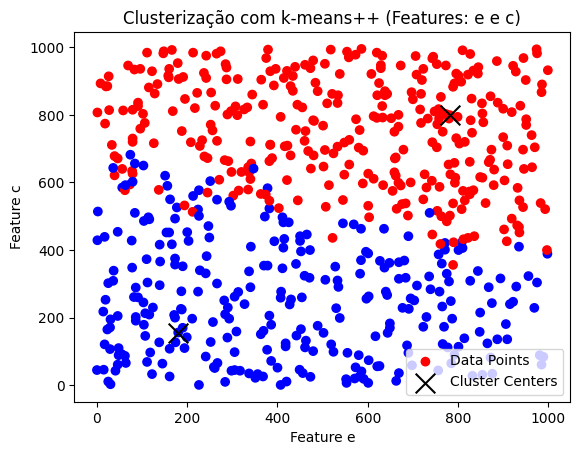

Número de pontos vermelhos: 323
Número de pontos azuis: 283


In [14]:
# Selecionar as features 'e' e 'c'
feature_e = dataframe["e"]
feature_c = dataframe["c"]

# Definir a coluna de cores para refletir os números dos clusters
colors = ["red", "blue", "green", "purple", "orange", "yellow", "brown"]
cluster_colors = [colors[label] for label in kmeans.labels_]

# Plotar os dados e os centros dos clusters
plt.scatter(feature_e, feature_c, c=cluster_colors, marker="o", label="Data Points")
plt.scatter(
    centers[:, dataframe.columns.get_loc("e")],
    centers[:, dataframe.columns.get_loc("c")],
    c="black",
    marker="x",
    s=200,
    label="Cluster Centers",
)

plt.title("Clusterização com k-means++ (Features: e e c)")
plt.xlabel("Feature e")
plt.ylabel("Feature c")
plt.legend()
plt.show()

# Contar quantos pontos são vermelhos e quantos são azuis
num_red = cluster_colors.count("red")
num_blue = cluster_colors.count("blue")

print(f"Número de pontos vermelhos: {num_red}")
print(f"Número de pontos azuis: {num_blue}")


In [15]:
# Aplicação do KMeans++ com 7 clusters
centers_7, indices_7 = kmeans_plusplus(data_array, n_clusters=7, random_state=42)
print("CENTROIDES k = 7")
print(centers_7)
print("INDICES k = 7")
print(indices_7)


CENTROIDES k = 7
[[399 752 799 815 782 660]
 [374 197 156  57 180 750]
 [520 703 369 914 681 515]
 [886 525 904 325 364 878]
 [ 53 579 950 265 753 310]
 [277 709 209 162 116 519]
 [386 575 523 134 382 687]]
INDICES k = 7
[226 425  27 369 500 114 273]


In [16]:
# Ajustar o modelo k-means com os centros inicializados
kmeans = KMeans(n_clusters=7, init=centers_7, n_init=1)
kmeans.fit(data_array)

# Observar os centros dos clusters
centers_cluster_7 = kmeans.cluster_centers_
print("Centros dos Clusters:")
print(centers_cluster_7)

# Calcular a diferença absoluta entre os centros dos clusters para cada feature
differences_7 = np.abs(centers_cluster_7[0] - centers_cluster_7[1])

# Identificar os índices das features com as maiores diferenças
top_2_attributes_indices_7 = np.argsort(differences_7)[-2:]

# Exibir os índices das 2 features com a maior diferença
print("Índices das 2 features com a maior diferença:")
print(top_2_attributes_indices_7)

# Exibir os nomes das 2 features com a maior diferença
top_2_attributes_names_7 = dataframe.columns[top_2_attributes_indices_7]
print("Nomes das 2 features com a maior diferença:")
print(top_2_attributes_names_7)


Centros dos Clusters:
[[387.80722892 773.22891566 745.3373494  707.15662651 669.71084337
  552.97590361]
 [396.05970149 224.29850746 231.97014925 255.35820896 506.56716418
  583.68656716]
 [399.37179487 527.69230769 195.61538462 820.38461538 472.55128205
  533.65384615]
 [909.58677686 525.04958678 570.01652893 479.23966942 472.14876033
  908.15702479]
 [443.59259259 426.20987654 721.30864198 266.85185185 742.32098765
  471.27160494]
 [396.08045977 775.62068966 314.91954023 291.28735632 292.90804598
  520.81609195]
 [426.53932584 274.79775281 762.74157303 621.26966292 295.15730337
  509.1011236 ]]
Índices das 2 features com a maior diferença:
[2 1]
Nomes das 2 features com a maior diferença:
Index(['c', 'b'], dtype='object')


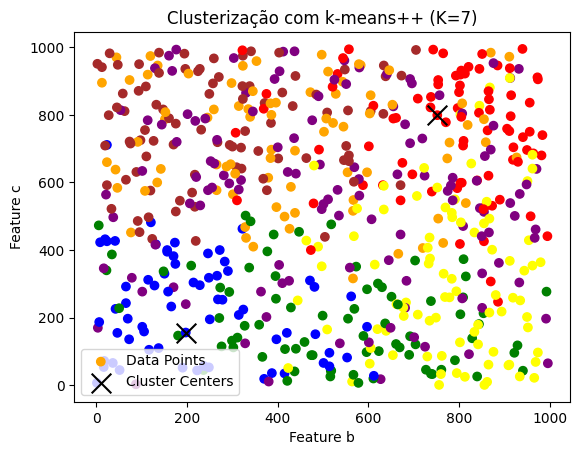

In [ ]:
# Selecionar as features 'b' e 'c'
feature_b_7 = dataframe["b"]
feature_c_7 = dataframe["c"]

# Definir a coluna de cores para refletir os números dos clusters
colors_7 = ["red", "blue", "green", "purple", "orange", "yellow", "brown"]
cluster_colors_7 = [colors[label] for label in kmeans.labels_]

# Plotar os dados e os centros dos clusters
plt.scatter(feature_b_7, feature_c_7, c=cluster_colors_7, marker="o", label="Data Points")
plt.scatter(
    centers[:, dataframe.columns.get_loc("b")],
    centers[:, dataframe.columns.get_loc("c")],
    c="black",
    marker="x",
    s=200,
    label="Cluster Centers",
)

plt.title("Clusterização com k-means++ (K=7)")
plt.xlabel("Feature b")
plt.ylabel("Feature c")
plt.legend()
plt.show()


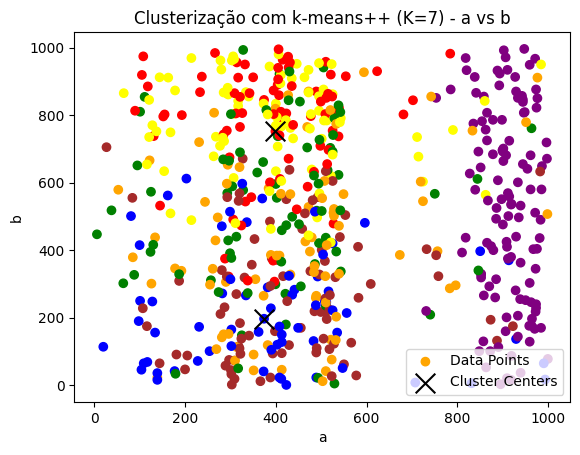

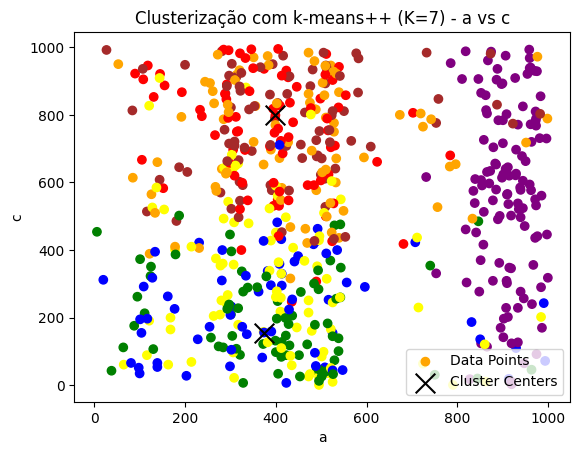

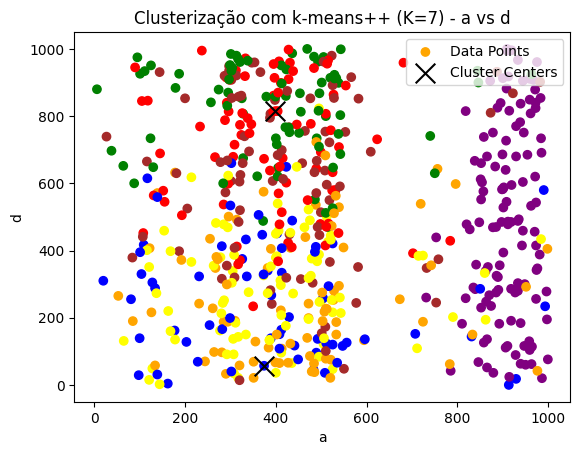

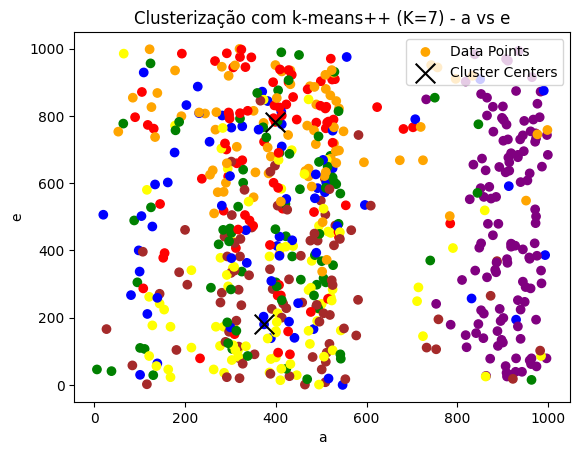

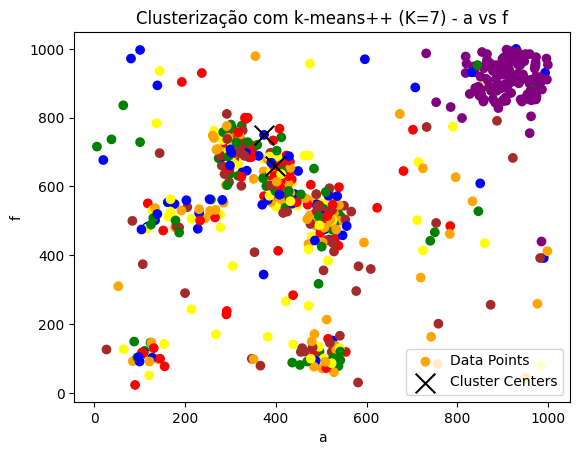

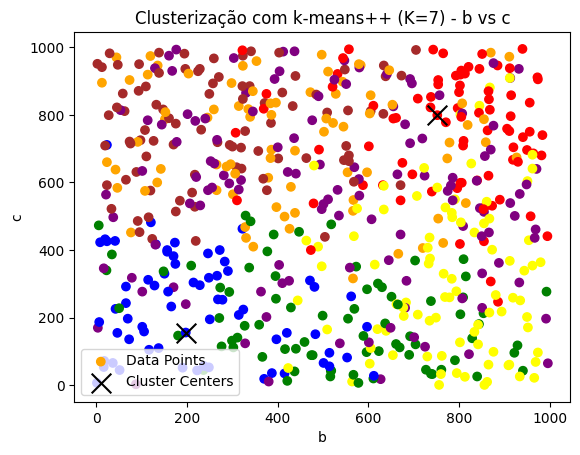

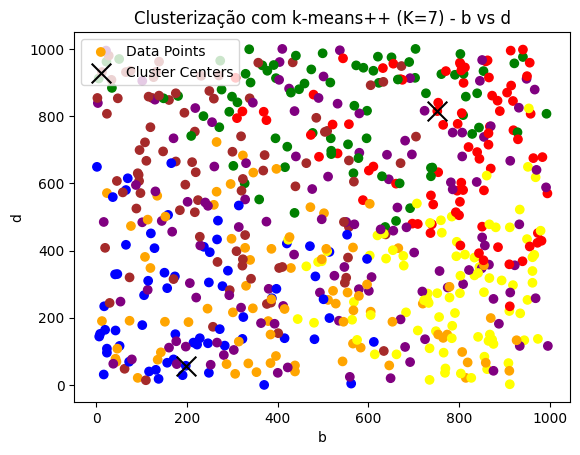

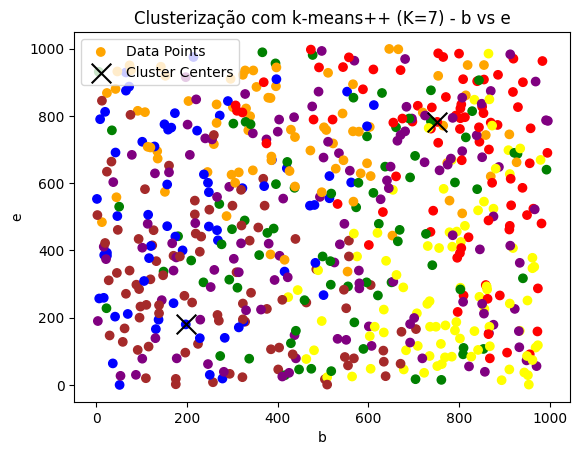

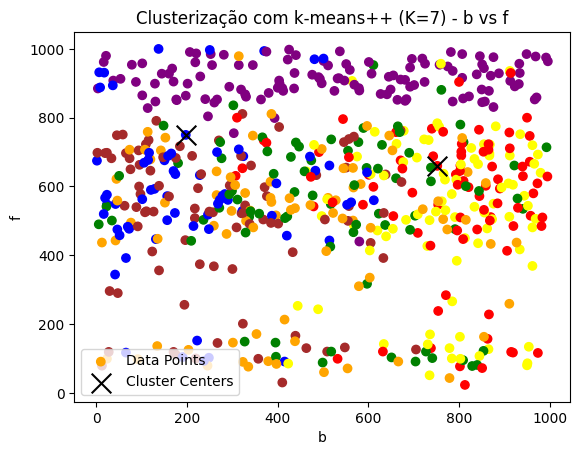

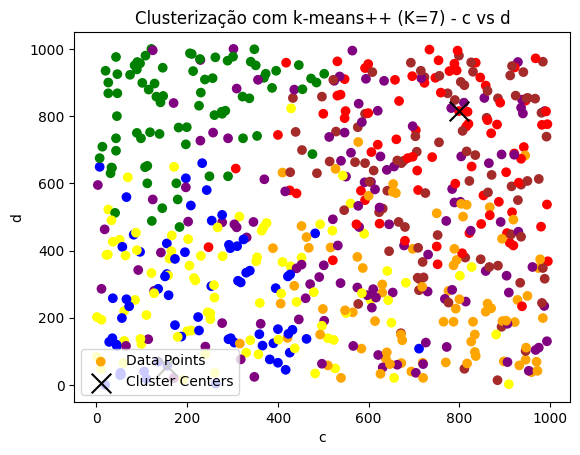

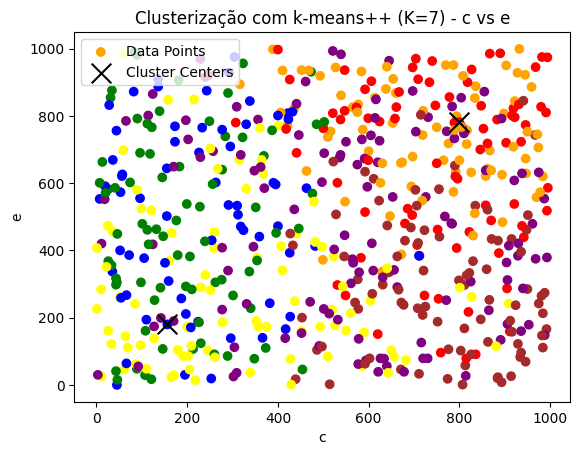

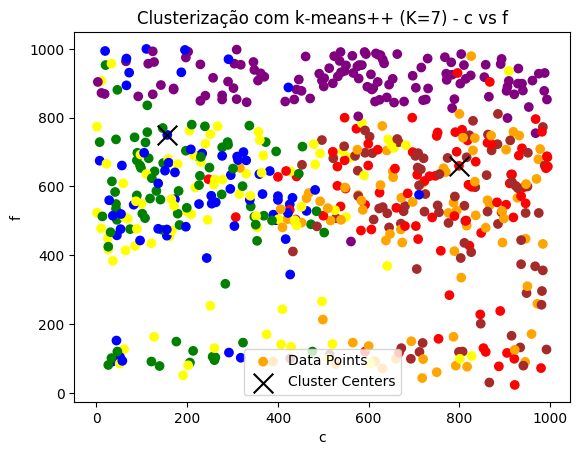

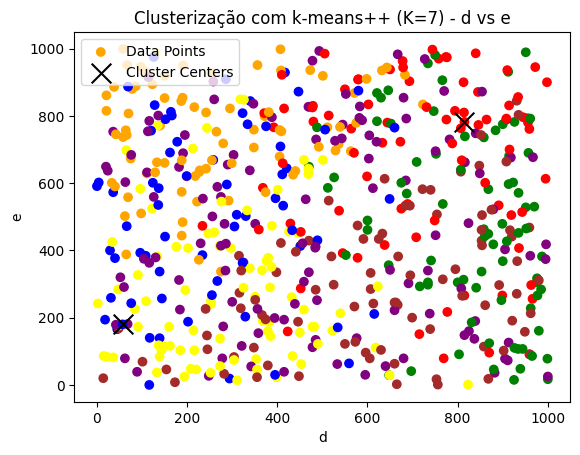

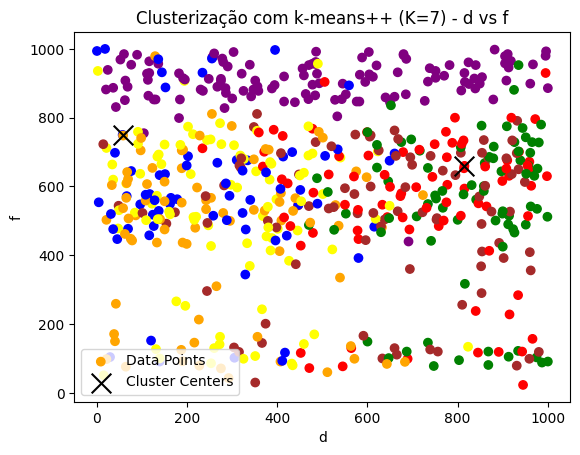

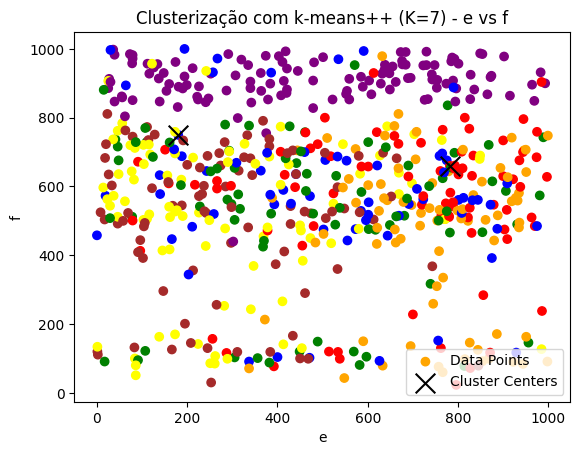

In [21]:
# Lista de pares de features
feature_pairs = [
    ("a", "b"),
    ("a", "c"),
    ("a", "d"),
    ("a", "e"),
    ("a", "f"),
    ("b", "c"),
    ("b", "d"),
    ("b", "e"),
    ("b", "f"),
    ("c", "d"),
    ("c", "e"),
    ("c", "f"),
    ("d", "e"),
    ("d", "f"),
    ("e", "f"),
]

# Iterar sobre os pares de features e plotar os gráficos bidimensionais
for feature_x, feature_y in feature_pairs:
    plt.figure()
    plt.scatter(
        dataframe[feature_x],
        dataframe[feature_y],
        c=cluster_colors_7,
        marker="o",
        label="Data Points",
    )
    plt.scatter(
        centers[:, dataframe.columns.get_loc(feature_x)],
        centers[:, dataframe.columns.get_loc(feature_y)],
        c="black",
        marker="x",
        s=200,
        label="Cluster Centers",
    )
    plt.title(f"Clusterização com k-means++ (K=7) - {feature_x} vs {feature_y}")
    plt.xlabel(feature_x)
    plt.ylabel(feature_y)
    plt.legend()
    plt.show()


-  Com base nos gráficos gerados, é possível observar uma separação dos dados presentes na feature roxa, indicando que estes são mais parecidos entre si e mais fácil de realizar os agrupamentos dessas informações.

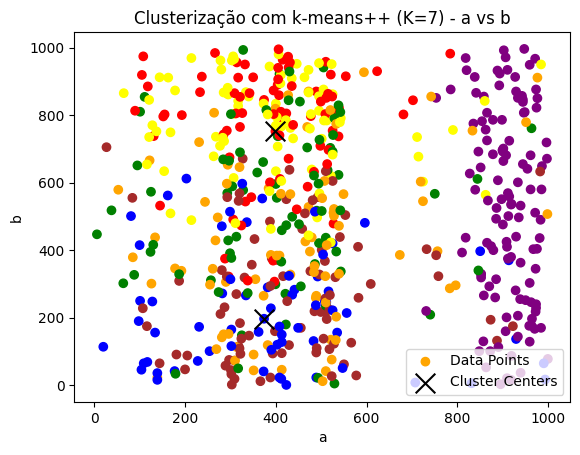

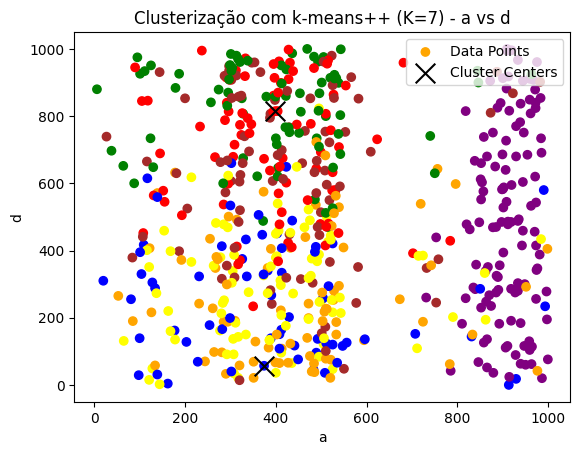

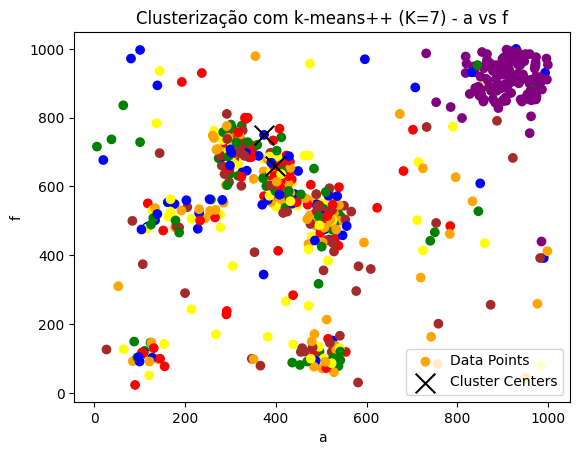

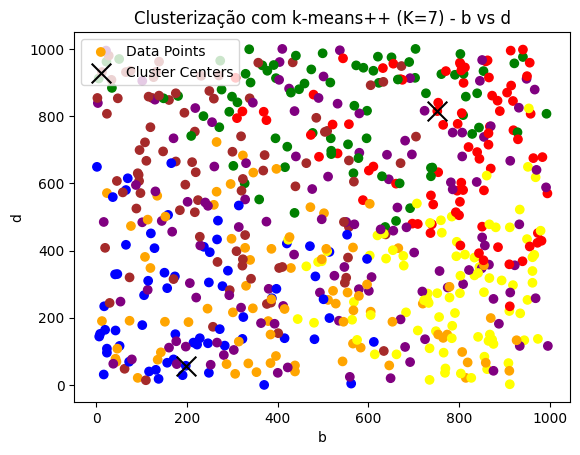

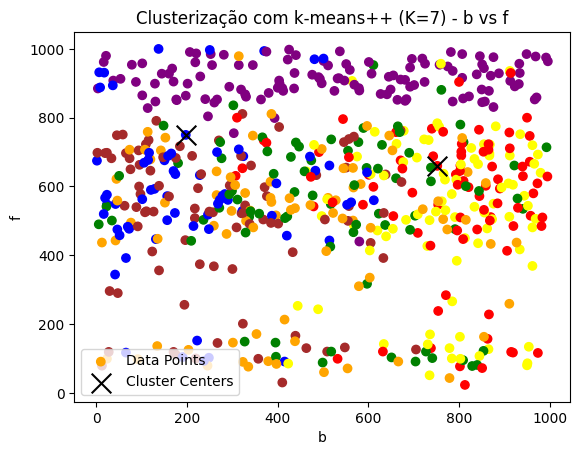

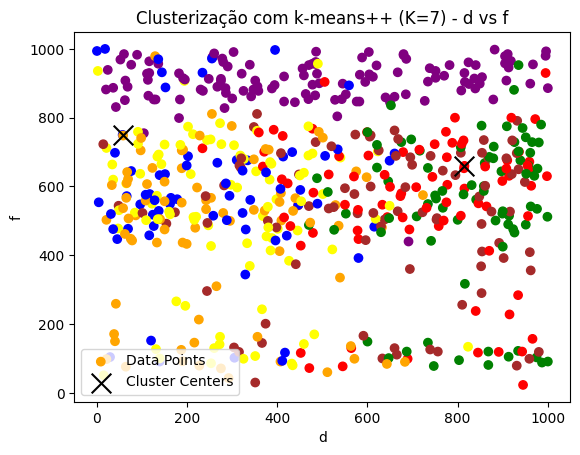

In [23]:
# Filtrar os pares de features para excluir aqueles que contenham 'e' e 'c'
filtered_feature_pairs = [
    pair for pair in feature_pairs if "e" not in pair and "c" not in pair
]

# Iterar sobre os pares de features restantes e plotar os gráficos bidimensionais
for feature_x, feature_y in filtered_feature_pairs:
    plt.figure()
    plt.scatter(
        dataframe[feature_x],
        dataframe[feature_y],
        c=cluster_colors_7,
        marker="o",
        label="Data Points",
    )
    plt.scatter(
        centers[:, dataframe.columns.get_loc(feature_x)],
        centers[:, dataframe.columns.get_loc(feature_y)],
        c="black",
        marker="x",
        s=200,
        label="Cluster Centers",
    )
    plt.title(f"Clusterização com k-means++ (K=7) - {feature_x} vs {feature_y}")
    plt.xlabel(feature_x)
    plt.ylabel(feature_y)
    plt.legend()
    plt.show()


- Sem as features da questão 2.1 é possível observar certa coesão nos agrupamentos plotados. Entende-se que os 7 clusters apresentam separação e delimitações.

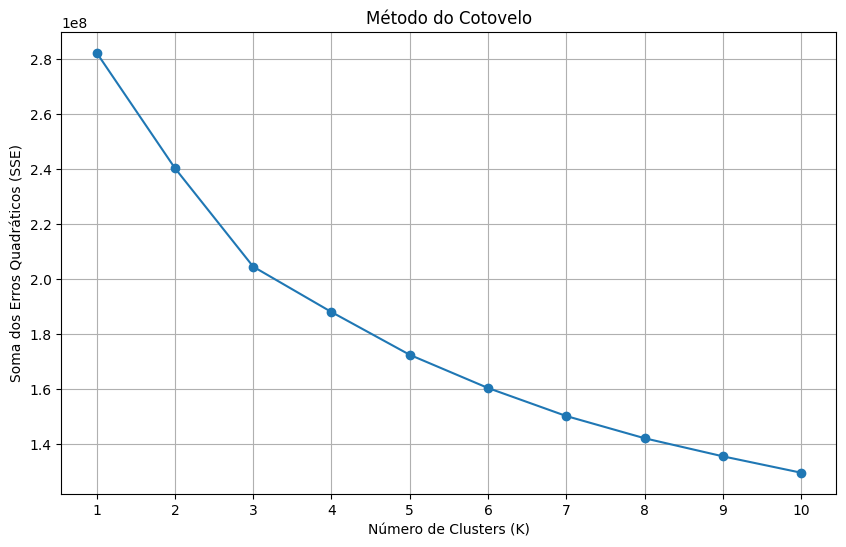

In [26]:
# Definir o intervalo de valores de K a serem testados
k_values = range(1, 11)

# Lista para armazenar a soma dos erros quadráticos (SSE) para cada valor de K
sse = []

# Calcular o SSE para cada valor de K
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_array)
    sse.append(kmeans.inertia_)

# Plotar o SSE em função de K
plt.figure(figsize=(10, 6))
plt.plot(k_values, sse, marker="o")
plt.title("Método do Cotovelo")
plt.xlabel("Número de Clusters (K)")
plt.ylabel("Soma dos Erros Quadráticos (SSE)")
plt.xticks(k_values)
plt.grid(True)
plt.show()


- Por meio do Elbow Method, percebe-se que aumentando K é possível separar ainda mais os dados, trazendo uma maior coesão para os agrupamentos.

In [ ]:
# Aplicação do KMeans++ com 8 clusters
centers_8, indices_8 = kmeans_plusplus(data_array, n_clusters=8, random_state=42)
print("CENTROIDES k = 8")
print(centers_8)
print("INDICES k = 8")
print(indices_8)


In [ ]:
# Aplicação do KMeans++ com 10 clusters
centers_10, indices_10 = kmeans_plusplus(data_array, n_clusters=10, random_state=42)
print("CENTROIDES k = 10")
print(centers_10)
print("INDICES k = 8")
print(indices_10)
